### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import numpy as np

### Reading the Dataset

In [2]:
df = pd.read_csv('lstm.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df1 = df.reset_index()['Low']
df1.head()

0    230.20
1    231.10
2    232.50
3    232.00
4    230.75
Name: Low, dtype: float64

### Data visualization

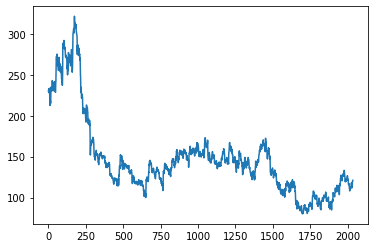

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Data preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62156011],
       [0.6252845 ],
       [0.63107801],
       ...,
       [0.16656321],
       [0.16656321],
       [0.16987378]])

In [6]:
train_size = int(len(df1)*0.80)
test_size = len(df1)-train_size
train_data , test_data = df1[:train_size], df1[train_size:]

In [7]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i+time_step])
    return np.array(dataX), np.array(dataY)

In [8]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

### Building model

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Traing the model and predicting the output

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=64)

Epoch 1/40
24/24 [==============================] - 19s 95ms/step - loss: 0.0178 - val_loss: 0.0031
Epoch 2/40
24/24 [==============================] - 1s 44ms/step - loss: 0.0018 - val_loss: 5.6734e-04
Epoch 3/40
24/24 [==============================] - 1s 39ms/step - loss: 0.0015 - val_loss: 7.3932e-04
Epoch 4/40
24/24 [==============================] - 1s 34ms/step - loss: 0.0014 - val_loss: 8.2126e-04
Epoch 5/40
24/24 [==============================] - 1s 31ms/step - loss: 0.0013 - val_loss: 6.6272e-04
Epoch 6/40
24/24 [==============================] - 1s 33ms/step - loss: 0.0013 - val_loss: 7.6183e-04
Epoch 7/40
24/24 [==============================] - 1s 32ms/step - loss: 0.0014 - val_loss: 9.2842e-04
Epoch 8/40
24/24 [==============================] - 1s 34ms/step - loss: 0.0015 - val_loss: 5.1497e-04
Epoch 9/40
24/24 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 4.7158e-04
Epoch 10/40
24/24 [==============================] - 1s 34ms/step - loss: 0.

In [13]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [14]:
trans = model.predict(X_test[-1::]) 
output = scaler.inverse_transform(trans)
output

array([[115.15265]], dtype=float32)

In [15]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [16]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

156.14392839094822

In [17]:
math.sqrt(mean_squared_error(y_test, test_predict))

105.40351356291535

### Data visualization

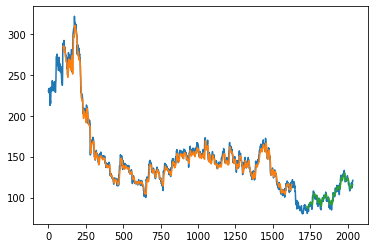

In [18]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
len(test_data)

407

In [20]:
x_input=test_data[307:].reshape(1,-1)
x_input.shape

(1, 100)

In [21]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.1249741361473205,
 0.13945789364783778,
 0.13904407200496582,
 0.1373887854334782,
 0.13490585557624662,
 0.14214773432650524,
 0.13656114214773435,
 0.12849162011173182,
 0.12456031450444854,
 0.09724808607490171,
 0.11276639768259877,
 0.14959652389819988,
 0.14111318021932545,
 0.1531140078626112,
 0.14525139664804465,
 0.1460790399337885,
 0.1655286571487689,
 0.17835712807779847,
 0.18290916614938968,
 0.19573763707841918,
 0.19449617214980341,
 0.1827022553279537,
 0.18415063107800544,
 0.18704738257810882,
 0.17835712807779847,
 0.18208152286364576,
 0.1843575418994413,
 0.1779433064349265,
 0.16759776536312848,
 0.19573763707841918,
 0.18849575832816057,
 0.19325470722118765,
 0.19966894268570246,
 0.19884129939995865,
 0.20153114007862605,
 0.20070349679288224,
 0.1992551210428306,
 0.1918063314711359,
 0.2002896751500104,
 0.2112559486861163,
 0.21249741361473207,
 0.20691082143596107,
 0.2205669356507346,
 0.21146285950755228,
 0.20546244568590943,
 0.19490999379267537,
 

In [22]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15392151]
101
1 day input [0.13945789 0.13904407 0.13738879 0.13490586 0.14214773 0.13656114
 0.12849162 0.12456031 0.09724809 0.1127664  0.14959652 0.14111318
 0.15311401 0.1452514  0.14607904 0.16552866 0.17835713 0.18290917
 0.19573764 0.19449617 0.18270226 0.18415063 0.18704738 0.17835713
 0.18208152 0.18435754 0.17794331 0.16759777 0.19573764 0.18849576
 0.19325471 0.19966894 0.1988413  0.20153114 0.2007035  0.19925512
 0.19180633 0.20028968 0.21125595 0.21249741 0.20691082 0.22056694
 0.21146286 0.20546245 0.19490999 0.17877095 0.17877095 0.17090834
 0.16201117 0.17049452 0.174012   0.17856404 0.17732257 0.16511484
 0.16470101 0.16987378 0.17380509 0.1721498  0.17173598 0.17794331
 0.18001241 0.1874612  0.19325471 0.18663356 0.17421891 0.17711566
 0.17318436 0.17380509 0.1663563  0.14938961 0.15187254 0.15352783
 0.15145872 0.14649286 0.1491827  0.13242293 0.12849162 0.11793917
 0.11628388 0.12290503 0.12725016 0.13490586 0.13345748 0.13242293
 0.13056073 0.13242293 0.13138837

In [23]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [24]:
import matplotlib.pyplot as plt

In [25]:
len(df1)

2035

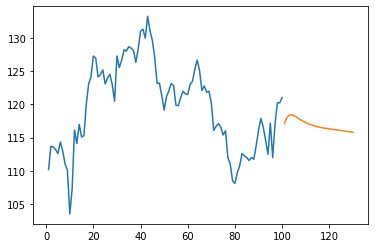

In [26]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

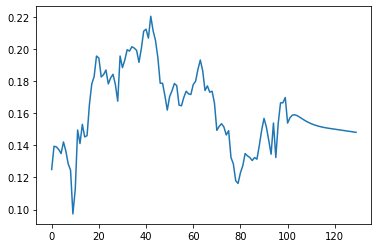

In [27]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1935:])

In [28]:
df3=scaler.inverse_transform(df3).tolist()

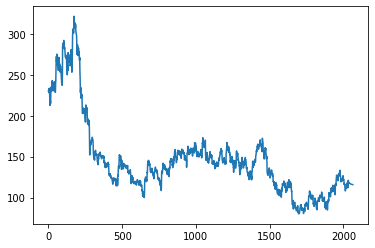

In [29]:
plt.plot(df3)